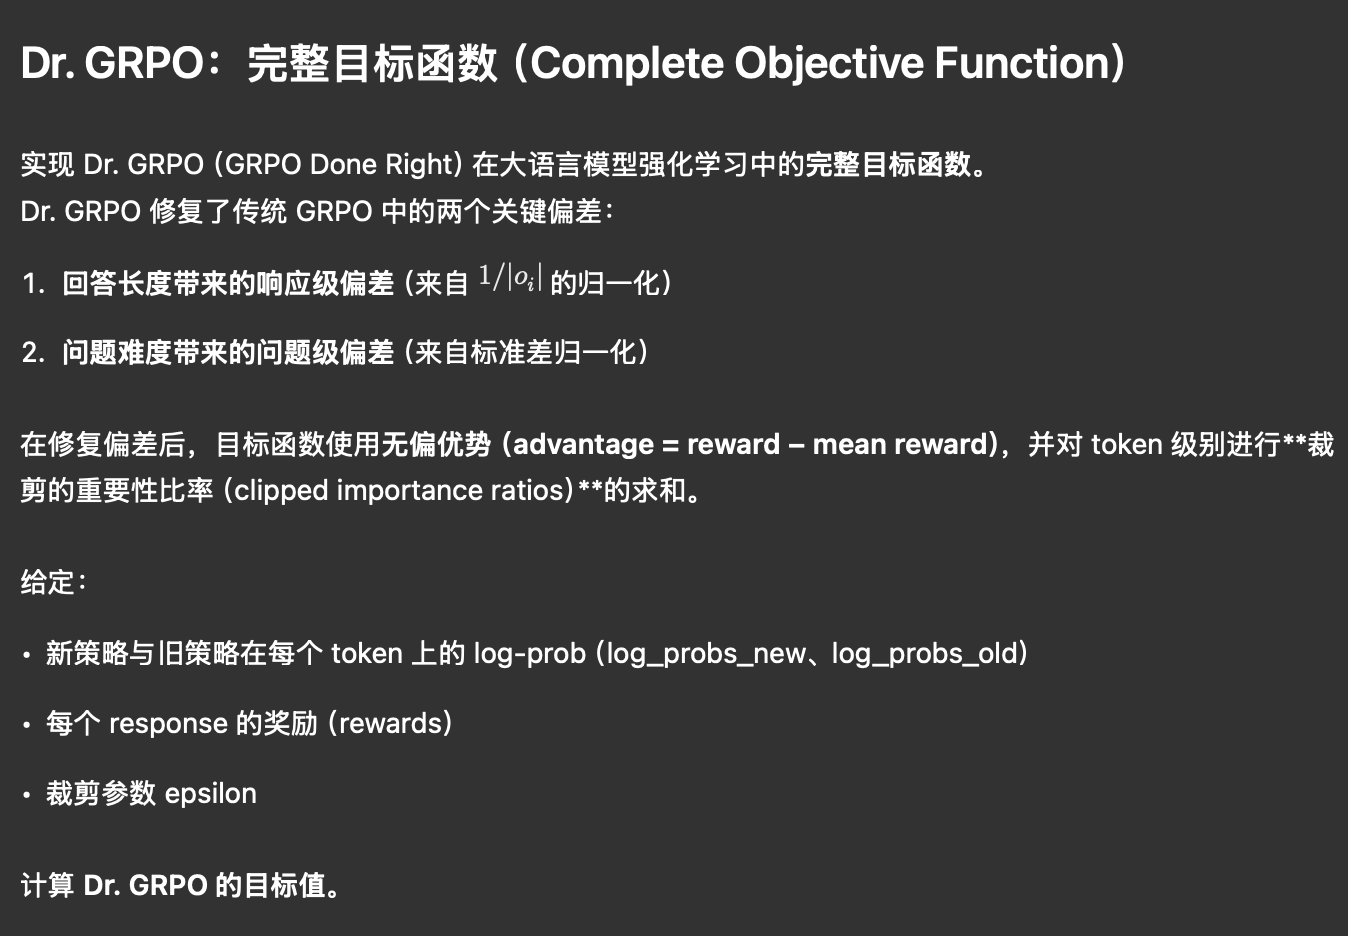
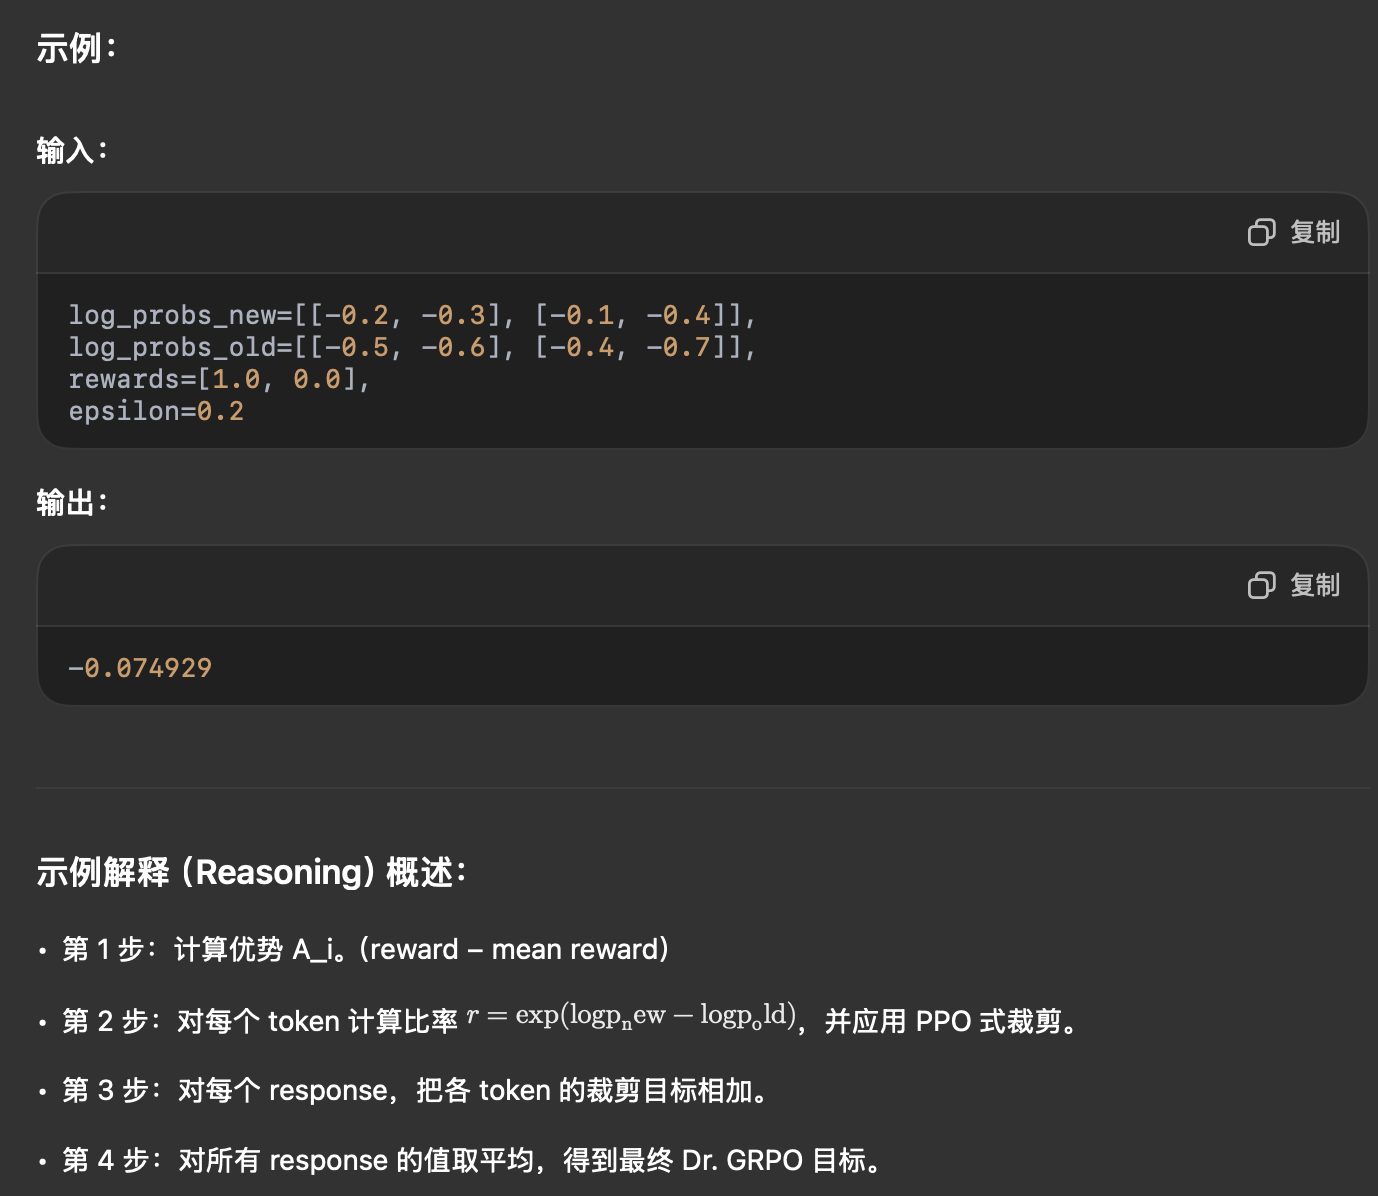

In [4]:
import numpy as np

def compute_dr_grpo_objective(log_probs_new: list[list[float]], 
                               log_probs_old: list[list[float]], 
                               rewards: list[float], 
                               epsilon: float = 0.2) -> float:
    """
    Compute the Dr. GRPO clipped objective.
    
    Args:
        log_probs_new: Log probabilities from new policy
        log_probs_old: Log probabilities from old policy
        rewards: Rewards for each response
        epsilon: Clipping parameter
    
    Returns:
        Dr. GRPO objective value
    """
    G = len(rewards)
    
    # Compute unbiased advantages
    mean_reward = np.mean(rewards)
    advantages = [r - mean_reward for r in rewards]
    
    total_objective = 0.0
    
    for i in range(G):
        response_length = len(log_probs_new[i])
        advantage = advantages[i]
        
        for t in range(response_length):
            # Compute importance ratio at token t
            ratio_t = np.exp(log_probs_new[i][t] - log_probs_old[i][t])
            
            # Unclipped objective
            obj_unclipped = ratio_t * advantage
            
            # Clipped objective
            ratio_clipped = np.clip(ratio_t, 1 - epsilon, 1 + epsilon)
            obj_clipped = ratio_clipped * advantage
            
            # Take minimum
            obj_t = np.minimum(obj_unclipped, obj_clipped)
            
            total_objective += obj_t
    
    # Average over group
    return float(total_objective / G)


if __name__ == "__main__":
    log_probs_new = [
        [-0.3, -0.1],
        [-0.6, -0.4]
    ]

    log_probs_old = [
        [-0.4, -0.2],
        [-0.5, -0.6]
    ]

    rewards = [2.0, 0.0]
    epsilon = 0.2
    res = compute_dr_grpo_objective(log_probs_new, log_probs_old, rewards, epsilon)
    print("The results is:", round(res, 6))


The results is: 0.042051


In [3]:
import numpy as np

def compute_dr_grpo_objective(log_probs_new: list[list[float]], 
                               log_probs_old: list[list[float]], 
                               rewards: list[float], 
                               epsilon: float = 0.2) -> float:
    G = len(rewards)
    mean_reward = np.mean(rewards)
    advantages = [r - mean_reward for r in rewards]
    
    total_objective = 0.0
    
    for i in range(G):
        response_length = len(log_probs_new[i])
        advantage = advantages[i]
        
        for t in range(response_length):
            ratio_t = np.exp(log_probs_new[i][t] - log_probs_old[i][t])
            obj_unclipped = ratio_t * advantage
            
            ratio_clipped = np.clip(ratio_t, 1 - epsilon, 1 + epsilon)
            obj_clipped = ratio_clipped * advantage
            
            obj_t = np.minimum(obj_unclipped, obj_clipped)
            total_objective += obj_t
    
    return float(total_objective / G)


# ---------- Test case ----------
log_probs_new = [
    [-0.3, -0.1],
    [-0.6, -0.4]
]

log_probs_old = [
    [-0.4, -0.2],
    [-0.5, -0.6]
]

rewards = [2.0, 0.0]
epsilon = 0.2

print(compute_dr_grpo_objective(log_probs_new, log_probs_old, rewards, epsilon))

0.042050829977582915
